<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/gan/gan_compare_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compare GANs trained on CelebA in terms of sample quality


In [3]:
# Setup for colab

%%capture
!sudo apt-get install subversion
!svn checkout https://github.com/probml/pyprobml/trunk/gan .
!pip install pytorch-lightning einops
!pip install superimport

!wget https://storage.googleapis.com/probml_data/gan_checkpoints/dcgan_celeba.ckpt
!wget https://storage.googleapis.com/probml_data/gan_checkpoints/sngan_celeba.ckpt
!wget https://storage.googleapis.com/probml_data/gan_checkpoints/gp_wgan_celeba.ckpt
!wget https://storage.googleapis.com/probml_data/gan_checkpoints/wgan_celeba.ckpt
!wget https://storage.googleapis.com/probml_data/gan_checkpoints/logan_celeba.ckpt

In [2]:
# Run Setup And Installation 

from utils.plotting import sample_from_truncated_normal
from assembler import get_config, assembler

def make_model(model_name, use_gpu=False):
  fname = f"./configs/{model_name}.yaml"
  config = get_config(fname)
  model = assembler(config)
  if use_gpu: model = model.to("cuda")
  return model

def make_and_load_models(model_names: list, use_gpu=False):
  models = []
  for model_name in model_names:
    model = make_model(model_name, use_gpu)
    model.load_model()
    models.append(model)
  return models 

# Compare results

In [4]:
import pytorch_lightning as pl
pl.seed_everything(99)

models_to_compare = ["dcgan","sngan", "logan", "wgan", "gp_wgan"]
figsize_reconstruction = (10, 30)
figsize_samples = (10, 10)

gans = make_and_load_models(models_to_compare, use_gpu = True)

Global seed set to 99


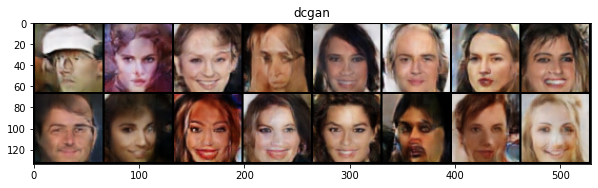

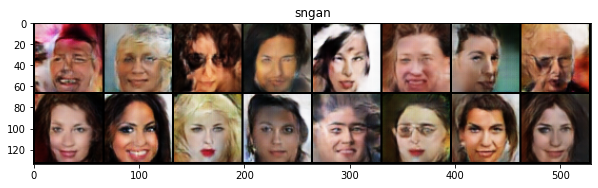

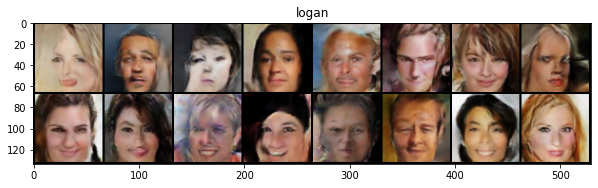

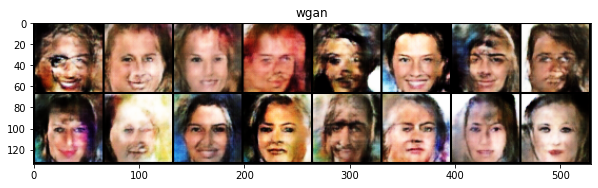

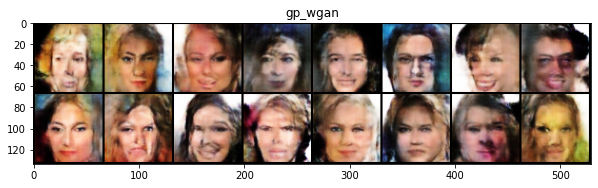

In [5]:
num = 16
sample_from_truncated_normal(gans, num)

# Save figures

In [6]:
!ls figures

ls: cannot access 'figures': No such file or directory


In [ ]:
!rm /content/gan-figs.zip
!zip -r /content/gan-figs.zip /content/figures

In [ ]:
from google.colab import files
files.download("/content/gan-figs.zip")